In [ ]:
%pip install tensorflow

In [ ]:
%pip install keras

In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Size of train data {}'.format(X_train.shape))
print('Size of test data {}'.format(X_test.shape))

Size of train data (50000, 32, 32, 3)
Size of test data (10000, 32, 32, 3)


In [ ]:
print('Size of train class {}'. format(y_train.shape))
print('Size of test class {}'. format(y_test.shape))

Size of train class (50000, 1)
Size of test class (10000, 1)


###Define class names for all 10 classes


In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))

In [ ]:
print('Total class {}'.format(num_classes))

Total class 10


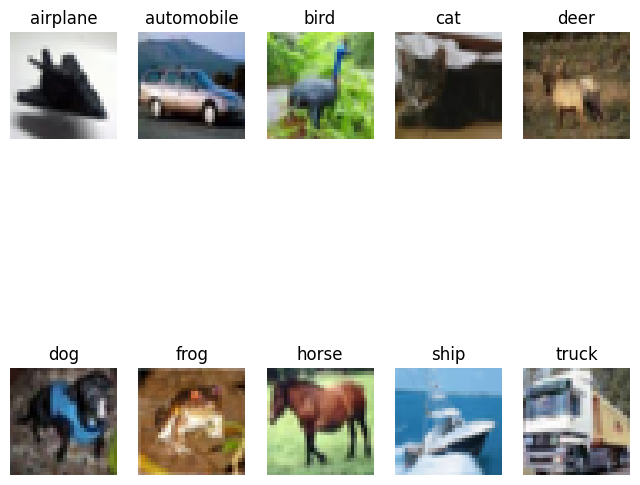

In [ ]:
# Plotting first image of all 10 classes from train data
plt.figure(figsize=(8, 8))
for i in range(num_classes):
  ax = plt.subplot(2, 5, i + 1)
  idx = np.where(y_train[:]==i)[0]
  features_idx = X_train[idx,::]
  plt.imshow(features_idx[0])
  ax.set_title(class_names[i])
  plt.axis("off")

In [ ]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

###Building the Model

In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [ ]:
seed = 21
np.random.seed(seed)
epochs=10
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size= batch_size)

Epoch 1/10
1563/1563 [==============================] - 23s 11ms/step - loss: 1.4593 - accuracy: 0.4710 - val_loss: 1.1803 - val_accuracy: 0.5750
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0513 - accuracy: 0.6278 - val_loss: 0.9745 - val_accuracy: 0.6558
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8897 - accuracy: 0.6841 - val_loss: 0.8355 - val_accuracy: 0.7095
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7981 - accuracy: 0.7178 - val_loss: 0.7892 - val_accuracy: 0.7239
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7189 - accuracy: 0.7469 - val_loss: 0.7803 - val_accuracy: 0.7259
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6625 - accuracy: 0.7666 - val_loss: 0.7959 - val_accuracy: 0.7222
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6128 - accuracy: 0.7843 - val_loss: 0.7346 - val_accurac